# This notebook covers:

  ### 1. Linear Regression
    (a): using formula
    (b): using gradient descent
    
### 2. Multi-linear Regression
    using sk-learn library
----

####      Linear Regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression.

<img src='./images/linear.png' width="400" height="600" />
 

    
    
    We are looking for a linear relation between x and y:  
    
$$ y = b + wx $$
    
    Where w and b can be found by using the given data x and y. This formula will be used for future prediction.
    
    We are going to compare three different ways to find the w and b
    
        1. formula 

        2. gradient descent 

        3. sk-learn 


###  First we need some data points

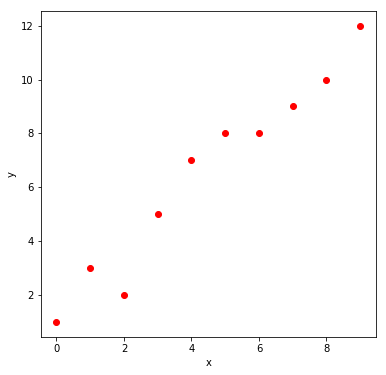

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# observations 
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
n = x.size

# PLOTING data and regression line 
plt.figure(figsize=(6,6))
plt.scatter(x, y, color = "r") 

# putting labels 
plt.xlabel('x') 
plt.ylabel('y') 

# function to show plot 
plt.show() 

## 1.A.  Using formula

    For linear regression, we have linear equation:  
       y = A + BX  
    where A is the bias or intercept and B is the weight or slope.  
    
    The following formula can be used to compute A and B        

<img src='./images/formula.gif' width="400" height="600" />

In [2]:
# use numpy array to find the A and B

# mean of x and y vector 
m_x, m_y = np.mean(x), np.mean(y) 

# calculating cross-deviation and deviation about x 
SS_xy = np.sum(y*x - n*m_y*m_x) 
SS_xx = np.sum(x*x - n*m_x*m_x) 

# calculating regression coefficients 
B = SS_xy / SS_xx 
A = m_y - B*m_x 

print("Estimated coefficients:\n A = {0:0.2f} B = {1:0.2f}".format(A, B)  ) 

# predict y based on the linear equation
y_pred = A + x*B 

# root mean squared error
print("RMS: %4.2f" % np.sqrt(np.mean((y - y_pred) ** 2)))



Estimated coefficients:
 A = -0.06 B = 1.46
RMS: 1.12


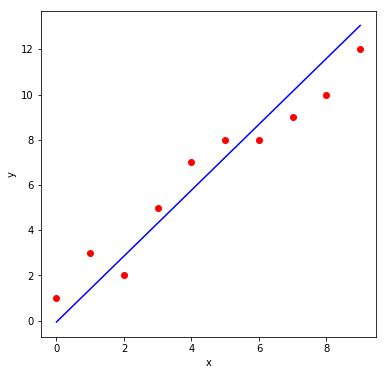

In [3]:
# PLOTING data and regression line 
plt.figure(figsize=(6,6))
plt.scatter(x, y, color = "r") 
plt.plot(x, y_pred, color = "b") 

# putting labels 
plt.xlabel('x') 
plt.ylabel('y') 

# function to show plot 
plt.show() 

## 1.B. Use Gradient Descent Method

     Objective Function:
        Sum squared error: SSE=Sum[(Yi-Y)^2] 
        Mean squared error: MSE=Sum[(Yi-Y)^2]/(n-1)
        Where error: Yi - Y
    We want the SSE as small as possible. This is an optimization problem. The method we use here is gradient descent to minimize SSE. Here use the optimizer from TensorFlow. We will keep the error for each iteration, then plot it.

<img src='./images/error-linear.png' width="200" height="200" />

Fianl: W: [0.91427594] b: [-0.7479608] loss: 0.042436995


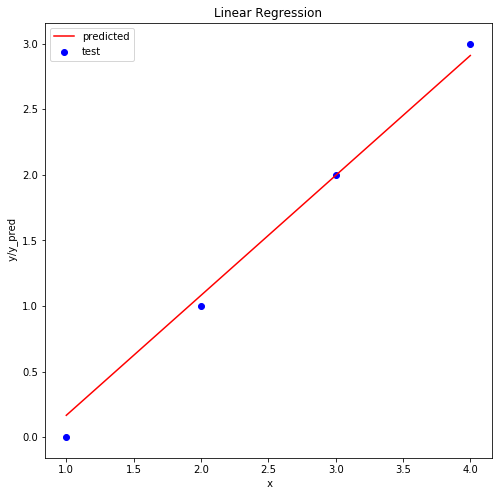

In [4]:
# linear regression: complete code

# TensorFlow provides optimizers that slowly change w and b in order to minimize the loss function. 
# The simplest optimizer is gradient descent
import tensorflow as tf
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares error

# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01) 
# steplength or rate = 0.01, you can change it

# plug in the loss function to the optimizer
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, 1, 2, 3]

# training loop
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init) # reset values to wrong

error=[]
for i in range(100):    # total iteration or loop, you can change it to dif. number
    _, _, _, loss_value = sess.run((W, b,train, loss), {x: x_train, y: y_train})
    error.append(loss_value)

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("Fianl: W: %s b: %s loss: %s" %(curr_W, curr_b, curr_loss))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title("Linear Regression")
plt.xlabel(' x')
plt.ylabel(' y/y_pred')

plt.scatter( x_train,  y_train, color='b', label="test")
y_pred = curr_W*x_train + curr_b
plt.plot(x_train,  y_pred, color='r', label="predicted")

plt.legend()
plt.show()

Text(0,0.5,'loss')

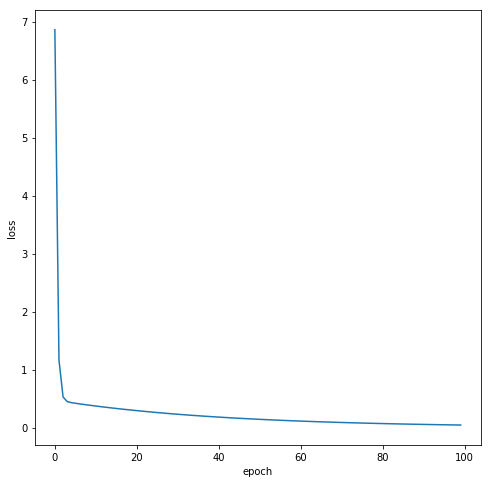

In [5]:
# plt.title('Convergency along the epoch')
plt.figure(figsize=(5, 5))
plt.plot(error)
plt.xlabel('epoch')
plt.ylabel('loss')

### We can see the gradient descent method gradually reduce the loss. At some point, loss tends to flat. Then we can stop. 
  
  ---
  ---
  


## 2. Multiple linear regression
	 For more than one variables problem: x1, x2, x3, … .. Xn -> y, this is called multiple linear regression(MLR) 
     
         Y  = w1x1 + w2x2 + ... + wnxn  + b
         or 
         Y = WX + B               	
     where W: vector, X: matrix, B: vector
-----

      We wil use Sklearn with boston house price dataset

<img src='./images/multiple-linear.jpg' width="400" height="600" />

In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline

# loading data and split to train/test
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
print("first row of X:\n", X_train[0, :])
print("\nfirst row of y:", y_train[0])

first row of X:
 [3.768e-02 8.000e+01 1.520e+00 0.000e+00 4.040e-01 7.274e+00 3.830e+01
 7.309e+00 2.000e+00 3.290e+02 1.260e+01 3.922e+02 6.620e+00]

first row of y: 34.6


RMS: 5.066908398770952 


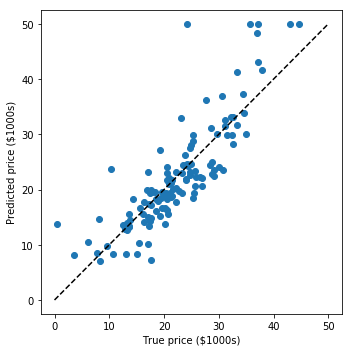

In [9]:
# use sklearn model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# prediction
y_pred= model.predict(X_test)

# accuracy
import numpy as np
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))

# plotting
plt.figure(figsize=(5, 5))
plt.scatter(y_pred, y_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

----
# Summary
    In this short notebook, we did linear regression using formula and gradient descent method. 
      
    For mulit-linear regression we used sk-learn. As sk-learn provides many regression tools, we will use it for later notebooks.
      
    Linear or multi-linear regression needs the residual has N(0, sigma^2) distribution, where sigma needs to constant. In reality, problems might not fit this category. In this case, we will need more complicated models. For example exponentail distribution, we can try: 
      - Logisit regression
      - Generalized Linear Regression
      
    There are many more regression models used in different cases, such as:
      - Neural Network
      - Kernel
      - K nearest neighbors regression
      - Softmax regression
      - more 
      
    In order to overcome the overfitting problem, regularization is often used in regression:
      - LASSO: L1, Least Absolute Shrinkage and Selection Operator. 
      - Ridge: L2, regularization
      - Elastic Net: L1 and L2 combination 
      

<img src ='./images/multiple-linear.jpg' width = '400' height='300' /> 